# Module 2: Data Analysis
## Sprint 4: Capstone Project


## About this Sprint

It is time for your second Capstone Project.
You will work on this project for the whole Sprint.

We are glad you have successfully reached the final Sprint of this Module.
You will put everything you have learned in this Module to work.
The outcome of this Sprint should potentially serve as your portfolio item.

The dataset for this Sprint is the Ultimate 25k+ Matches Football Database.
It is a large dataset, which will provide your with a lot of opportunities both for statistical inference and for prediction.
Once again you will not have concrete tasks or predefined questions - you'll have to be creative and crate a plan for yourself, how to explore the data.

You already had experience doing that while completing the capstone project for the Module 1.
In the industry it's your responsibility as a data scientist to come up with plans and hypothesis for the dataset, so this is an essential skill to practice.
Good luck!

## Objectives for this Part

- Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
- Practice performing EDA, statistical inference, and prediction.
- Practice working with SQL datasets.
- Practice visualizing data.

## Data

### Ultimate 25k+ Matches Football Database

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1489944440615-453fc2b6a9a9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1482&q=80" /></div>

Imagine that you are a data scientist working in a sports betting company.
The business executives in your company after some initial analysis (they watched this video [Understanding European Soccer in Four Simple Steps: A Guide For Americans](https://www.youtube.com/watch?v=FZ4i3KX2CW4)) identified betting on soccer (European football) as an potential new business opportunity.
The problem is that your company doesn't know a lot about soccer (European football).
Your manager asked you to analyse this dataset and see if you can provide anything that could give us a competitive advantage in the attempt to start strong in the new endevor.
She has provided your with some questions, which she suggests are a good starting point for your analysis.

- Which leagues are in which countries?
- Which leagues score the most/fewest goals?
- Who are the top scorers in each team and league?
- Is there such a thing as home advantage?
- Can we predict how many goals each team will score in each match?
- Can we predict which team will win the match?

The link to the [Kaggle dataset is here](https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european).

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use SQL and Pandas functions to create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using SQL or Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Perform statistical inference. Raise and test statistical hypotheses. Set appropriate significance levels and create confidence intervals for the variables of interest.
- Train linear machine learning models and use them for forecasting. Use cross validation, information criteria, and/or other methods to specify your models correctly. Choose and use appropriate metrics to measure your models' performance.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a nonlinear machine learning model to explain relationships between features and predict new values.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?


## Table of contents
* [Introduction](#introduction)
* [Data Content](#data_content)
* [Helper Functions](#func)
* [Data Cleaning](#data)
* [Exploratory Data Analysis](#eda)
* [Inferential Statistical Analysis](#inf)
* [Machine Learning](#ml)
* [Conclusion](#conclusion)
* [Bonus Challenge](#bonus)

## **Introduction**<a name="introduction"></a>

I will analyze Football Matches Database. It consists of matches, teams and players from major football leagues in Europe. I ill do a data cleaning first, then EDA part, Inferential Statistcs Analyzes and lastly a Machine Learning modeling. 

### **Data Content**<a name="data_content"></a>

Data set is saved in SQLite database and contains 7 tables:

**Player** table contains information about player such as his name, surname, date of bearth, height, weight.  
**Player_Attributes** table contains variuos information about player such as.: preffered foot, speed, agility and etc.  
**Country** and **League** tables contain information about country in which particular League is organized.  
**Team** table contains information about teams - names and short names.  
**Team Attributes** table has information about variuos team characteristics, e.g. overall team's speed or dribling ability.  
**Match** table contains information about matches in all leagues during 2008 - 2015 seasons.

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import xml.etree.ElementTree as ET
import re
import warnings
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
    StandardScaler,
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from typing import List, Dict

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
warnings.filterwarnings("ignore")
%matplotlib inline

### **Helper Functions**<a name="func"></a>

In [2]:
def find_mode(col: pd.Series) -> str:
    "Takes a column or row and returns a most frequent string value"

    most_common = pd.Series.mode(col)
    if len(most_common) > 1:
        return most_common[0]
    else:
        return most_common


def match_outcome(row: pd.Series) -> int:
    "Takes a row or column and returns an integer value"

    winner = row["home_team_goal"] - row["away_team_goal"]

    if winner == 0:
        return 2
    elif winner < 0:
        return 3
    else:
        return 1


def match_outcome_string(row: pd.Series) -> str:
    "Takes a row or column and returns a string value"

    if row["match_outcome"] == 1:
        home_team_result = "Win"
        away_team_result = "Loss"
    elif row["match_outcome"] == 3:
        home_team_result = "Loss"
        away_team_result = "Win"
    else:
        home_team_result = "Draw"
        away_team_result = "Draw"

    return [home_team_result, away_team_result]


def scored_players(row: pd.Series) -> List[str]:
    "Takes a row or columns and returns a list of strings"

    if not row:
        return None

    scorers_lst = []

    root = ET.fromstring(row)
    for child in root:
        player = child.find("player1")
        goal_type = child.find("goal_type")

        if player != None and goal_type != None:
            if goal_type.text not in ["dg", "npm", "o", "rp"]:
                scorers_lst.append(player.text)

    if len(scorers_lst) > 0:
        return ";".join(scorers_lst)
    else:
        return None


def goal_count(grouped_df: pd.DataFrame) -> Dict[pd.Series, pd.Series]:
    """Takes a grouped pandas DataFrame and returns a dictionary
    of pandas Series"""

    temp_dict = {}

    for group, frame in grouped_df:
        items_list = []
        for i, v in frame["scorers"].items():
            if not v:
                continue
            items = v.split(";")
            items_list.extend(items)
        items_list = pd.Series(items_list)
        if len(items_list) == 0:
            continue
        items_count = items_list.value_counts()

        temp_dict[group] = items_count

    return temp_dict


def height_rating(height: pd.Series) -> str:
    "Takes a row or column and returns a string value"

    if height <= 177.8:
        return "157.48 < Height <= 177.8 cm."
    elif height <= 182.8:
        return "177.8 < Height <= 182.8 cm."
    elif height <= 185.42:
        return "182.88 < Height <= 185.42 cm."
    return "185.42 < Height <= 203.2 cm."


def weight_rating(weight: pd.Series) -> str:
    "Takes a row or column and returns a string value"

    if weight <= 72.12:
        return "53.07 < Weight <= 72.12 kg."
    elif weight <= 76.2:
        return "72.12 < Weight <= 76.2 kg."
    elif weight <= 81.19:
        return "76.2 < Weight <= 81.19 kg."
    return "81.19 < Weight <= 110.22 kg."


def birthday_rating(b_day: pd.Series) -> str:
    "Takes a row or column and returns a string value"

    if b_day <= 1983:
        return "1970 < Born <= 1983"
    elif b_day <= 1987:
        return "1983 < Born <= 1987"
    elif b_day <= 1991:
        return "1987 < Born <= 1991"
    return "1991 < Born <= 1999"


def results_to_df(
    y_test: np.ndarray,
    y_predicted: np.ndarray,
    target_names: List[str],
    model_name: str,
) -> pd.DataFrame:

    "Takes an input and returns pandas DataFrame"

    result_dict = classification_report(
        y_test, y_predicted, target_names=target_names, output_dict=True
    )
    temp_df = pd.DataFrame.from_dict(result_dict, orient="columns")
    temp_df.drop(columns="weighted avg", inplace=True)
    temp_df.drop(temp_df[temp_df.index == "support"].index, inplace=True)
    temp_df = temp_df.rename(
        columns={col: f"{model_name}_{col}" for col in temp_df.columns}
    )

    return temp_df

### **Data Cleaning**<a name="data"></a>

In [3]:
conn = sql.connect("soccer_database.sqlite")
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [4]:
football_df_all = {}

for table in tables:
    query = "SELECT * from " + str(table[0]) + ";"
    football_df_all[table[0]] = pd.read_sql_query(query, conn)

In [5]:
player_df = football_df_all["Player"].copy()

In [6]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
player_df.drop(columns=["id", "player_fifa_api_id"], inplace=True)
player_df["weight"] = player_df["weight"] * 0.45359237
player_df["weight"] = player_df["weight"].round(2)

In [8]:
player_attr_df = football_df_all["Player_Attributes"].copy()

In [9]:
player_attr_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
player_attr_df.drop(columns=["id", "player_fifa_api_id"], inplace=True)
player_stats_df = pd.merge(
    player_df, player_attr_df, left_on="player_api_id", right_on="player_api_id"
)
player_stats_df["date"] = pd.DatetimeIndex(player_stats_df["date"]).year

In [11]:
cat_player_stats = player_stats_df.groupby(["player_api_id", "date"], as_index=False)[
    [
        "player_name",
        "birthday",
        "preferred_foot",
    ]
].agg(lambda x: find_mode(x))

In [12]:
cat_player_stats["player_name"] = cat_player_stats["player_name"].apply(
    lambda x: re.sub(r",.*", "", x)
)
num_player_stats = player_stats_df.groupby(
    ["player_api_id", "date"], as_index=False
).agg("mean")

In [13]:
player_stats_agg_df = pd.merge(
    cat_player_stats,
    num_player_stats,
    on=["player_api_id", "date"],
)
player_stats_agg_df["birthday"] = pd.DatetimeIndex(player_stats_agg_df["birthday"]).year
player_stats_agg_df["date"] = player_stats_agg_df["date"].astype(str)

In [14]:
player_stats_agg_df.head()

,player_api_id,date,player_name,birthday,preferred_foot,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,2007,Patryk Rachwal,1981,right,175.26,69.85,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,48.5,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,14.0,17.5,67.0,16.5,17.0
1,2625,2008,Patryk Rachwal,1981,right,175.26,69.85,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,14.0,24.0,67.0,24.0,24.0
2,2625,2010,Patryk Rachwal,1981,right,175.26,69.85,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0,12.0,11.0,6.0,8.0,8.0
3,2625,2011,Patryk Rachwal,1981,right,175.26,69.85,58.5,60.5,52.0,47.0,46.0,58.0,37.0,56.0,49.0,50.0,66.0,58.0,66.0,63.0,58.0,49.0,61.5,68.0,55.0,77.0,55.0,58.0,71.0,65.0,49.0,55.0,66.0,63.0,63.0,57.0,12.0,11.0,6.0,8.0,8.0
4,2625,2012,Patryk Rachwal,1981,right,175.26,69.85,58.0,58.0,52.0,47.0,46.0,53.0,37.0,56.0,49.0,50.0,66.0,58.0,67.0,63.0,67.0,49.0,76.0,68.0,55.0,77.0,55.5,58.0,71.0,64.0,49.0,55.0,66.0,63.0,63.0,52.0,12.0,11.0,6.0,8.0,8.0


In [15]:
country_df = football_df_all["Country"].copy()

In [16]:
league_df = football_df_all["League"].copy()

In [17]:
league_country_df = pd.merge(country_df, league_df, on="id")
league_country_df.drop(columns="country_id", inplace=True)
league_country_df.rename(
    columns={"name_x": "country", "name_y": "league"}, inplace=True
)

In [18]:
matches_df = football_df_all["Match"].copy()

In [19]:
matches_df.drop(columns=["id", "country_id", "PSH", "PSD", "PSA"], inplace=True)
matches_df["season"] = matches_df["season"].apply(lambda x: x[:4])
matches_df = pd.merge(league_country_df, matches_df, left_on="id", right_on="league_id")
matches_df.drop(columns="id", inplace=True)
matches_df["total_goal_per_match"] = (
    matches_df["home_team_goal"] + matches_df["away_team_goal"]
)
matches_df["match_outcome"] = matches_df.apply(match_outcome, axis=1)

In [20]:
matches_df[["home_team_result", "away_team_result"]] = matches_df.apply(
    match_outcome_string, axis=1, result_type="expand"
)

In [21]:
matches_df.head()

,country,league,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,total_goal_per_match,match_outcome,home_team_result,away_team_result
0,Belgium,Belgium Jupiler League,1,2008,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,2,2,Draw,Draw
1,Belgium,Belgium Jupiler League,1,2008,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,2,Draw,Draw
2,Belgium,Belgium Jupiler League,1,2008,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,3,3,Loss,Win
3,Belgium,Belgium Jupiler League,1,2008,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,5,1,Win,Loss
4,Belgium,Belgium Jupiler League,1,2008,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,4,3,Loss,Wi

In [22]:
matches_df["scorers"] = matches_df["goal"].apply(scored_players)

In [23]:
matches_df.drop(
    columns=[
        "goal",
        "shoton",
        "shotoff",
        "foulcommit",
        "card",
        "cross",
        "corner",
        "possession",
    ],
    inplace=True,
)

In [24]:
teams_df = football_df_all["Team"].copy()

In [25]:
teams_df.drop(columns=["team_fifa_api_id", "team_short_name", "id"], inplace=True)

In [26]:
team_attr = football_df_all["Team_Attributes"].copy()

In [27]:
team_attr.drop(columns=["id", "team_fifa_api_id", "buildUpPlayDribbling"], inplace=True)
teams_stats_final = pd.merge(
    teams_df, team_attr, left_on="team_api_id", right_on="team_api_id"
)
teams_stats_final["date"] = pd.DatetimeIndex(teams_stats_final["date"]).year

In [28]:
teams_stats_final.head()

,team_api_id,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,KRC Genk,2010,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,KRC Genk,2011,66,Balanced,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,KRC Genk,2012,53,Balanced,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,9987,KRC Genk,2013,58,Balanced,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,9987,KRC Genk,2014,58,Balanced,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


###  **Exploratory data analysis**<a name="eda"></a>

Let's analyze players first. I will start with looking at players weight and height distribution.

In [29]:
subset = player_stats_agg_df.groupby("player_api_id")[
    ["birthday", "height", "weight"]
].mean()

In [30]:
subset.describe()

,birthday,height,weight
count,11060.000000,11060.000000,11060.000000
mean,1986.642857,181.867445,76.375393
std,5.481362,6.369201,6.799564
min,1967.000000,157.480000,53.070000
25%,1983.000000,177.800000,72.120000
50%,1987.000000,182.880000,76.200000
75%,1991.000000,185.420000,81.190000
max,1999.000000,208.280000,110.220000


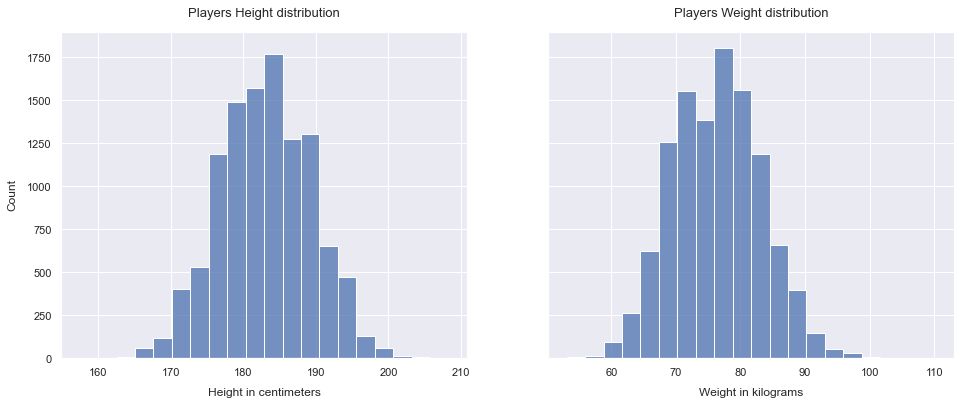

In [31]:
col_lst = ["height", "weight"]
measure_lst = ["centimeters", "kilograms"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, ax in enumerate(axes.flatten()):

    sns.histplot(
        data=subset,
        x=subset[col_lst[i]],
        bins=20,
        kde=False,
        ax=ax,
    )
    ax.set_xlabel(
        f"{col_lst[i].capitalize()} in {measure_lst[i]}", fontsize=12, labelpad=10
    )
    ax.set_ylabel("Count", fontsize=12, labelpad=10)
    ax.set_title(f"Players {col_lst[i].capitalize()} distribution", fontsize=13, y=1.03)


plt.show()

From the histograms we see that players ```Height``` falls mainly in 175 - 185 range, with mean being around 180 centimeters and players ```Weight``` distributed in a range from 70 to 85 kilogram, mean being around 75 - 76 kilograms. Let's also check who are those outliers with a weight of more than 105 kg. we see in histogram.

In [32]:
print(player_stats_agg_df[player_stats_agg_df["weight"] > 105]["player_name"].unique())

['Tim Wiese' 'Kristof van Hout']


In [33]:
subset["height_categorized"] = subset["height"].apply(height_rating)
subset["weight_categorized"] = subset["weight"].apply(weight_rating)
subset["birthday_categorized"] = subset["birthday"].apply(birthday_rating)

In [34]:
b_day_height = subset.groupby(
    ["birthday_categorized", "height_categorized"], as_index=False
).size()
b_day_height = b_day_height.groupby("birthday_categorized").apply(calc_ratio)

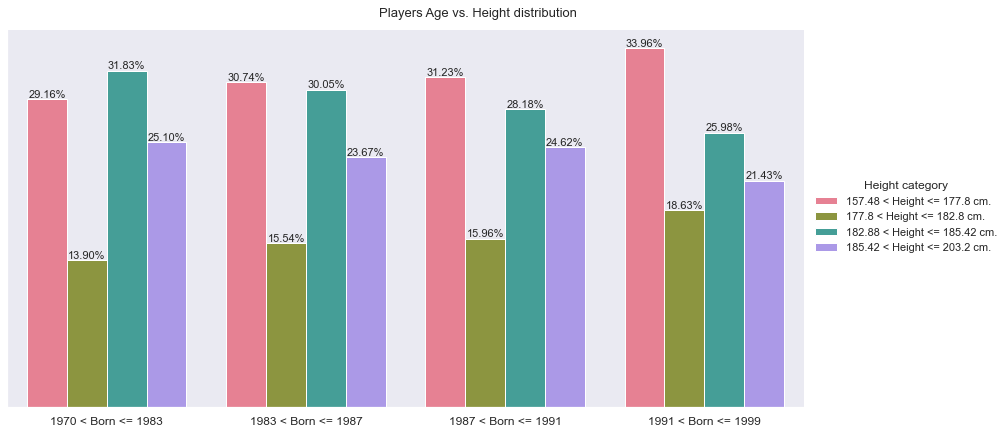

In [35]:
catplot_with_pct(
    b_day_height,
    "birthday_categorized",
    "ratio",
    "height_categorized",
    "Players Age vs. Height distribution",
)

Ok, so we see that players share whose ```Height``` is between 157.48 and 177.8.42 centimeters is increasing going from oldest to youngest players. Also second shortest category of players share is increasing too. Players share who are between 182.88 and 203.02 is decreasing the younger the player.  

In [36]:
b_day_weight = subset.groupby(
    ["birthday_categorized", "weight_categorized"], as_index=False
).size()
b_day_weight = b_day_weight.groupby("birthday_categorized").apply(calc_ratio)

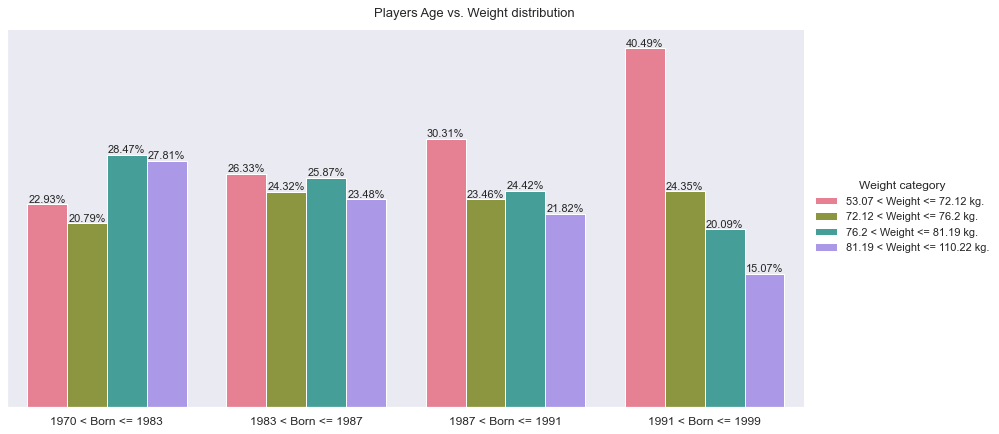

In [37]:
catplot_with_pct(
    b_day_weight,
    "birthday_categorized",
    "ratio",
    "weight_categorized",
    "Players Age vs. Weight distribution",
)

We see quite logical trend - ```Lightest``` players share is increasing the younger the player. Other weight categories fluctuates in relatively small range across first 3 age categories, but in a youngest players category we see quite noticing decrease of heavier players. Humans physiology is such, that with age there is a bigger chance your weight is going to increase. As data is from 2008 - 2015 range, youngest players are between 17 and 24 years old.

In [38]:
match_merge = matches_df.iloc[:, np.r_[1:11, 104:109]]
match_merge.loc[:, "season"] = match_merge.loc[:, "season"].astype(int)
teams_merge = teams_stats_final.iloc[:, :3]
match_teams = pd.merge(
    match_merge,
    teams_merge,
    how="left",
    left_on=["home_team_api_id"],
    right_on=["team_api_id"],
)
match_teams = pd.merge(
    match_teams,
    teams_merge,
    how="left",
    left_on=["away_team_api_id"],
    right_on=["team_api_id"],
    suffixes=("_HM", "_AW"),
)

In [39]:
match_teams.drop(
    columns=["date_x", "date_y", "team_api_id_HM", "team_api_id_AW", "date"],
    inplace=True,
)
match_teams.drop(match_teams[match_teams.duplicated() == True].index, inplace=True)
match_teams.rename(
    columns={
        "team_long_name_HM": "home_team_name",
        "team_long_name_AW": "away_team_name",
    },
    inplace=True,
)

In [40]:
g = match_teams.groupby(["season", "home_team_api_id", "away_team_api_id"])
g_count = goal_count(g)

In [41]:
g_df = pd.concat(
    [v for v in g_count.values()], axis=1, keys=[k for k in g_count.keys()]
)
g_df = g_df.unstack().reset_index()
g_df = g_df.dropna()
g_df.rename(
    columns={
        "level_0": "season",
        "level_1": "home_team_api_id",
        "level_2": "away_team_api_id",
        "level_3": "player_api_id",
        0: "total_goals",
    },
    inplace=True,
)

In [42]:
temp_df = player_stats_agg_df.iloc[:, :5]
g_df["player_api_id"] = g_df["player_api_id"].astype(int)
temp_df["date"] = temp_df["date"].astype(int)
g_df_player = pd.merge(
    g_df,
    temp_df,
    left_on=["player_api_id", "season"],
    right_on=["player_api_id", "date"],
)
players_matches_teams_df = pd.merge(
    g_df_player,
    match_teams,
    left_on=["season", "home_team_api_id", "away_team_api_id"],
    right_on=["season", "home_team_api_id", "away_team_api_id"],
)
players_matches_teams_df.drop(columns="scorers", inplace=True)

In [43]:
top_10_scorers = (
    players_matches_teams_df.groupby(
        ["player_api_id", "player_name", "preferred_foot"], as_index=False
    )
    .agg({"total_goals": "sum"})
    .sort_values(by="total_goals")[-10:]
)

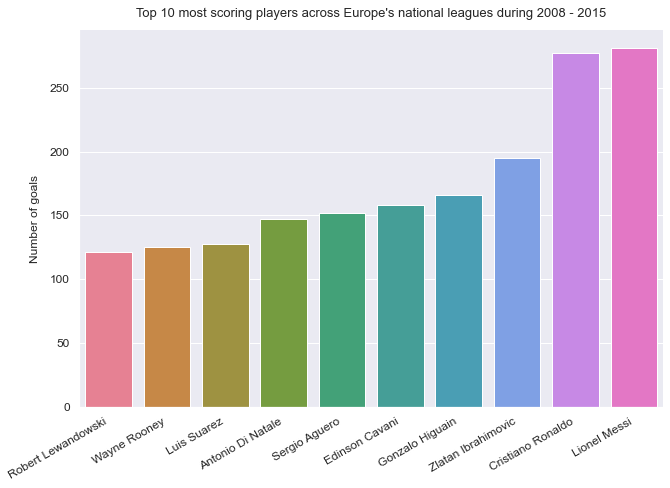

In [44]:
g = sns.catplot(
    x="player_name",
    y="total_goals",
    data=top_10_scorers,
    kind="bar",
    ci=None,
    height=6,
    aspect=1.5,
    palette="husl",
)

g.axes.flat[0].set_xlabel("")
g.axes.flat[0].set_ylabel("Number of goals", fontsize=12, labelpad=10)
g.axes.flat[0].set_xticklabels(
    g.axes.flat[0].get_xticklabels(), rotation=30, ha="right", fontsize=12
)
g.axes.flat[0].set_yticklabels(g.axes.flat[0].get_yticklabels(), fontsize=12)

plt.title(
    "Top 10 most scoring players across Europe's national leagues during 2008 - 2015",
    fontsize=13,
    y=1.02,
)

plt.show()

As we see ```Lionel Messi``` and ```Christiano Ronaldo``` were dominating as top scorers during 2008 - 2015, followed by ```Zlatan Ibrahimovic```. Now, let's check top scoring players among ```leagues```.

In [45]:
subset_ls = (
    players_matches_teams_df.groupby(["league", "player_name"], as_index=False)
    .agg({"total_goals": "sum"})
    .sort_values(by="total_goals", ascending=False)
)
subset_ls = subset_ls.groupby("league").head(1).sort_values(by="total_goals")

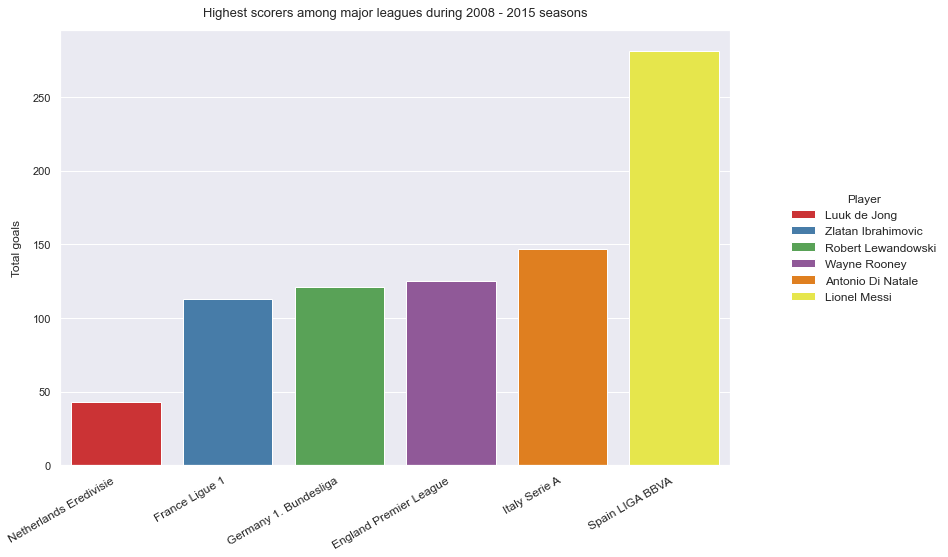

In [46]:
bar_plot(
    subset_ls[-6:],
    "league",
    "total_goals",
    "player_name",
    "Set1",
    "Highest scorers among major leagues during 2008 - 2015 seasons",
)

As we see ```Lionel Messi``` is the highest scorer, followed by ```Antonio Di Natale``` and ```Wayne Rooney```. We can also check how players performed in particular league during different season. Let's check England Premiere League.

In [47]:
premiere_l = (
    players_matches_teams_df.groupby(
        ["league", "season", "player_name"], as_index=False
    )
    .agg({"total_goals": "sum"})
    .sort_values(by="total_goals", ascending=False)
)
premiere_l = premiere_l.groupby(["league", "season"]).head(1).sort_values(by="season")
premiere_l = premiere_l[premiere_l["league"] == "England Premier League"]

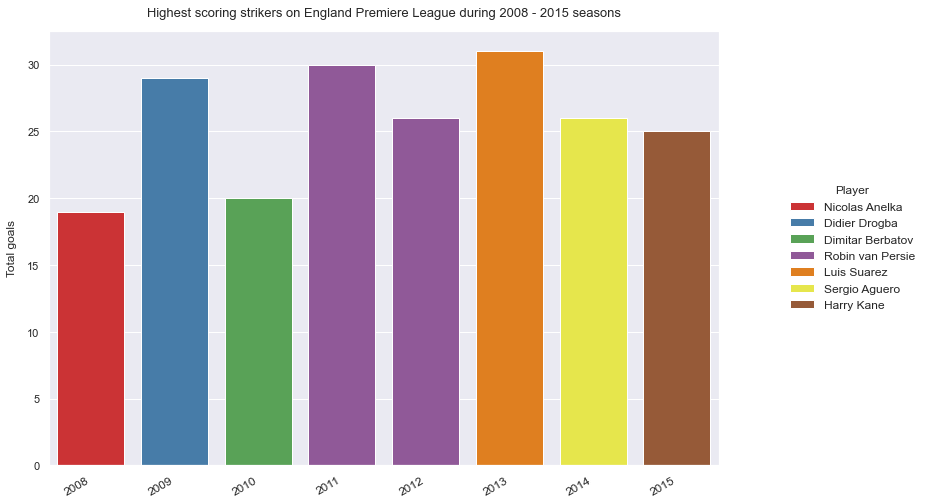

In [48]:
bar_plot(
    premiere_l,
    "season",
    "total_goals",
    "player_name",
    "Set1",
    "Highest scoring strikers on England Premiere League during 2008 - 2015 seasons",
)

Ok, so we see ```Robin van Persie``` was top scorer of Premier League during 2011 and 2012. ```Luis Suarez``` is a top scorer among 2008 - 2015 seasons. Perhaps his results could have been even better if he hadn't bitten his opponents in 2013 season and been suspended for 10 games. https://www.si.com/si-wire/2013/04/24/liverpool-luis-suarez-suspended-biting

In [49]:
subset_players_h = (
    players_matches_teams_df.groupby(["home_team_name", "player_name"], as_index=False)
    .agg({"total_goals": "sum"})
    .sort_values(by="total_goals", ascending=False)
)
subset_players_h = (
    subset_players_h.groupby("home_team_name")
    .head(1)
    .sort_values(by=["total_goals", "home_team_name"], ascending=[False, True])[:10]
)
subset_players_a = (
    players_matches_teams_df.groupby(["away_team_name", "player_name"], as_index=False)
    .agg({"total_goals": "sum"})
    .sort_values(by="total_goals", ascending=False)
)
subset_players_a = (
    subset_players_a.groupby("away_team_name")
    .head(1)
    .sort_values(by=["total_goals", "away_team_name"], ascending=[False, True])[:10]
)

In [50]:
subset_merged = pd.merge(
    subset_players_h,
    subset_players_a,
    how="outer",
    left_on="player_name",
    right_on="player_name",
)
subset_merged[["total_goals_x", "total_goals_y"]] = subset_merged[
    ["total_goals_x", "total_goals_y"]
].fillna(0)
lst = ["FC Bayern Munich", "Chelsea", "Arsenal"]
for i in range(3):
    subset_merged.iloc[i + 10, 0] = lst[i]
lst2 = ["FC Bayern Munich", "Roma", "FC Schalke 04"]
for i in range(3):
    subset_merged.iloc[i + 7, 3] = lst2[i]
subset_merged["total_goals"] = (
    subset_merged["total_goals_x"] + subset_merged["total_goals_y"]
)

In [51]:
subset_merged = subset_merged.sort_values(by="total_goals")

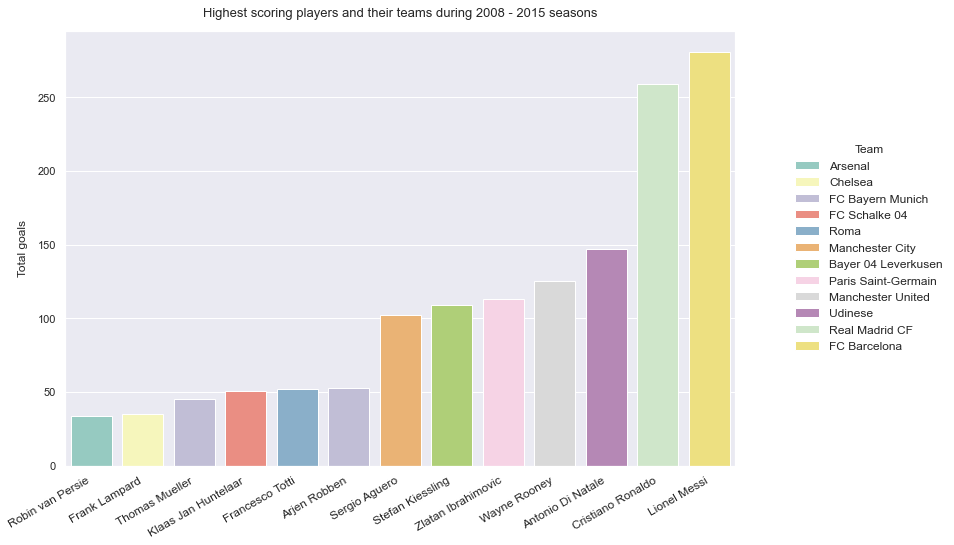

In [52]:
bar_plot(
    subset_merged,
    "player_name",
    "total_goals",
    "home_team_name",
    "Set3",
    "Highest scoring players and their teams during 2008 - 2015 seasons",
    "Team",
)

In this graph we see top scorers and teams they belong too. A domination by ```Christiano Ronaldo``` and ```Lionel Messi``` can be explained not only by their top scoring abilities but also because they have not changed teams during 2008 - 2015 seasons.

In [53]:
max_goals = (
    players_matches_teams_df.groupby(["league", "player_name"], as_index=False)
    .agg({"total_goals": "max"})
    .sort_values(by="total_goals", ascending=False)
)
max_goals = (
    max_goals.groupby("league")
    .head(3)
    .sort_values(by=["league", "total_goals"], ascending=[True, False])
)
major_leagues = [
    "England Premier League",
    "France Ligue 1",
    "Germany 1. Bundesliga",
    "Italy Serie A",
    "Spain LIGA BBVA",
    "Netherlands Eredivisie",
]
max_goals = max_goals[max_goals["league"].isin(major_leagues)]

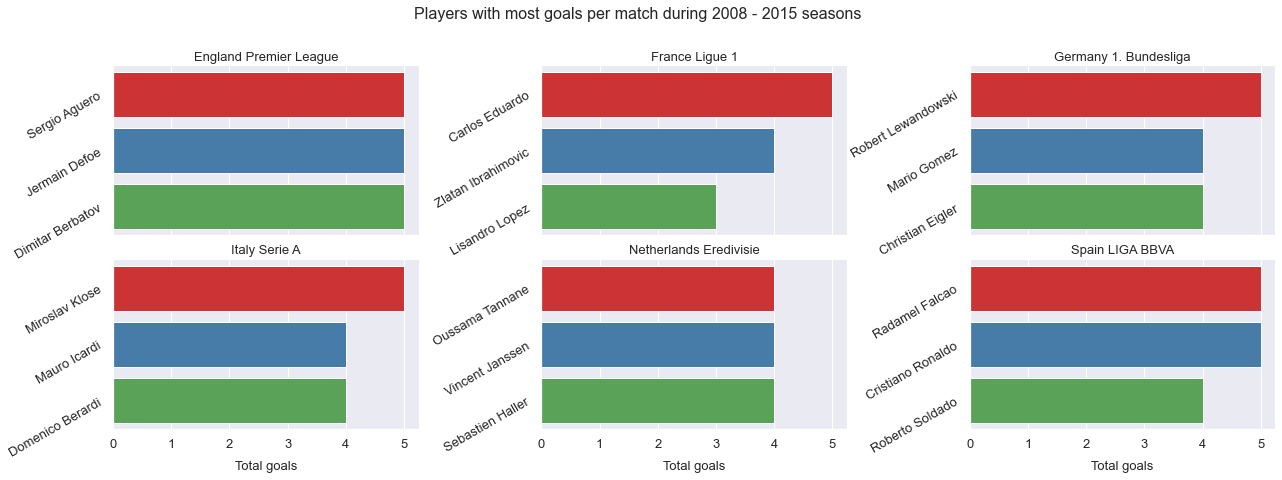

In [54]:
team_lst = max_goals["league"].unique()

g = sns.catplot(
    x="total_goals",
    y="player_name",
    col="league",
    data=max_goals,
    kind="bar",
    orient="h",
    sharey=False,
    col_wrap=3,
    ci=None,
    height=3,
    aspect=2,
    palette="Set1",
)

for i, ax in enumerate(g.axes.flat):
    ax.set_title(f"{team_lst[i]}", fontsize=13)
    ax.tick_params(axis="both", which="major", labelsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=30, ha="right", fontsize=13)
    if i in [3, 4, 5]:
        ax.set_xlabel("Total goals", fontsize=13, labelpad=10)
    if i in [0, 3]:
        ax.set_ylabel("")

g.fig.suptitle(
    "Players with most goals per match during 2008 - 2015 seasons",
    fontsize=16,
    y=1.08,
)

plt.show()

Ok, so we see that in ```Premiere League``` 3 players managed to score 5 goals per match. Spain ```LIGA BBVA``` has to players with 5 goals per match. Other leagues have less players who scored 5 goals. E.g. Netherlands ```Eredivisie``` has only a players who managed to score 3 goals per match. Partly it can be explained by a level of players playing in different leagues.

We have analyzed players so far, so let's move and explore teams and leagues too.

In [55]:
home = matches_df["home_team_goal"].value_counts()
away = matches_df["away_team_goal"].value_counts()
home_away = pd.concat([home, away], axis=1, keys=["Home Team", "Away Team"])
home_away = home_away.unstack().reset_index()

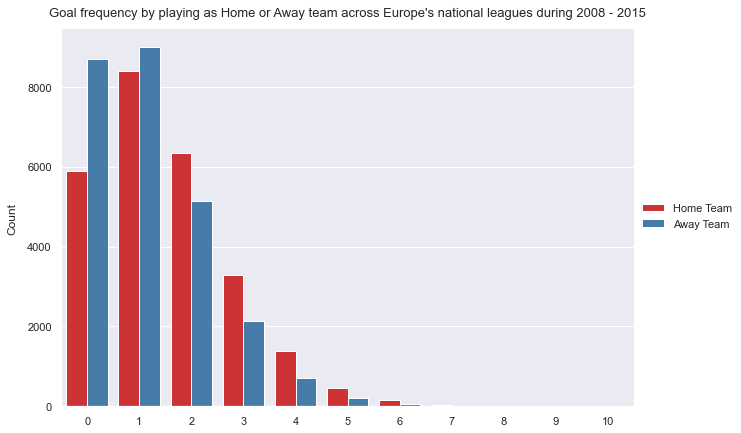

In [56]:
g = sns.catplot(
    x="level_1",
    y=0,
    data=home_away,
    hue="level_0",
    kind="bar",
    height=6,
    aspect=1.5,
    ci=False,
    palette="Set1",
)

g.axes.flat[0].set_xlabel("")
g.axes.flat[0].set_ylabel("Count", fontsize=12, labelpad=10)
g._legend.set_title("")

plt.title(
    "Goal frequency by playing as Home or Away team across Europe's national leagues during 2008 - 2015",
    fontsize=13,
    y=1.02,
)

plt.show()

As we see, the so called ```home advantage``` exists as we can see from the graph, that ```Home``` teams are less likely to score 0 goals when playing at home and are tend to score more goals e.g. 2, 3 and so on. ```Away``` teams usually end up scoring none or 1 goal and are less likely to score more goals per match. 

Let's also see how Home and Away teams scored accross seasons.

In [57]:
goals_per_season = (
    matches_df[["season", "total_goal_per_match", "away_team_goal", "home_team_goal"]]
    .groupby(by="season")
    .sum()
)

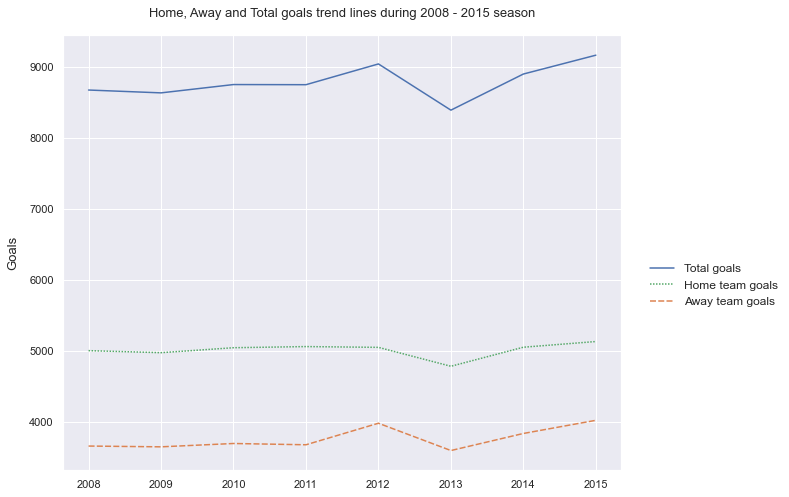

In [58]:
leg_labels = ["Total goals", "Home team goals", "Away team goals"]

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.lineplot(data=goals_per_season)

ax.set_xlabel("")
ax.set_ylabel("Goals", fontsize=13, labelpad=10)

handles, labels = ax.get_legend_handles_labels()
order = [0, 2, 1]

ax.legend(
    handles=[handles[i] for i in order],
    labels=leg_labels,
    bbox_to_anchor=(1.3, 0.5),
    edgecolor="white",
    facecolor="white",
    fontsize=12,
)

ax.set_title(
    "Home, Away and Total goals trend lines during 2008 - 2015 season",
    fontsize=13,
    y=1.03,
)

plt.show()

So, we see quite flat trend, only from 2013 season goals count start increasing. As a graph shows - ```Home``` teams score over 1000 goal more on average.

In [59]:
win_loss = (
    matches_df[["season", "home_team_result"]]
    .groupby(["season", "home_team_result"], as_index=False)
    .size()
)
win_loss = win_loss.groupby("season").apply(calc_ratio)
result_order = pd.CategoricalDtype(["Win", "Loss", "Draw"], ordered=True)

win_loss["home_team_result"] = win_loss["home_team_result"].astype(result_order)

win_loss.sort_values(
    by=["season", "home_team_result"], ascending=[True, True], inplace=True
)

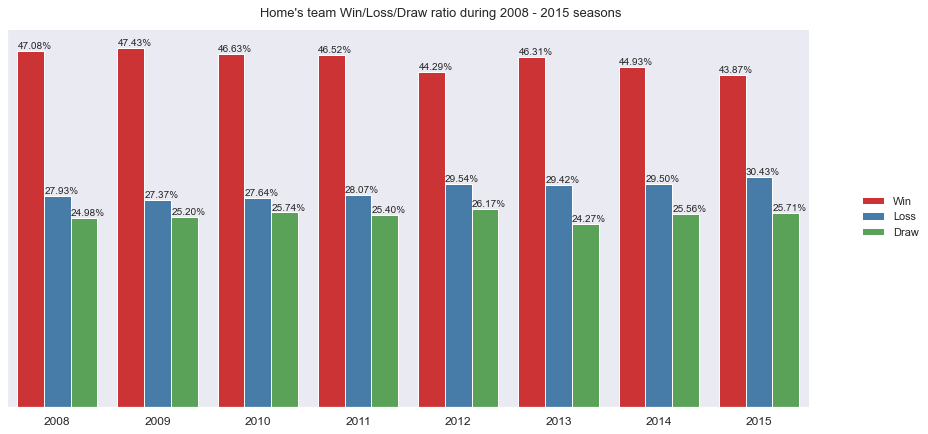

In [60]:
g = sns.catplot(
    x="season",
    y="ratio",
    hue="home_team_result",
    data=win_loss,
    kind="bar",
    ci=None,
    height=6,
    aspect=2,
    palette="Set1",
)

g._legend.set_title("")

ax = g.axes.flat[0]
ax.set_xlabel("")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(4, 5),
        size=10,
        textcoords="offset points",
    )

g.axes.flat[0].get_yaxis().set_visible(False)
g.axes.flat[0].tick_params(axis="x", which="major", labelsize=12)
g.fig.suptitle(
    "Home's team Win/Loss/Draw ratio during 2008 - 2015 seasons", fontsize=13, y=1.03
)

plt.show()

Ok, so we can see that ```Home``` advantage is a bit decreasing during seasons, and ```Away``` teams win more a and more victories. Althought changes are gradual but not huge.

In [61]:
leag_matches = (
    matches_df[["league", "home_team_result", "season"]]
    .groupby(["league", "home_team_result"], as_index=False)
    .size()
)

In [62]:
leag_matches = leag_matches.groupby("league").apply(calc_ratio)
result_order = pd.CategoricalDtype(["Win", "Loss", "Draw"], ordered=True)

leag_matches["home_team_result"] = leag_matches["home_team_result"].astype(result_order)

leag_matches.sort_values(
    by=["league", "home_team_result"], ascending=[True, True], inplace=True
)

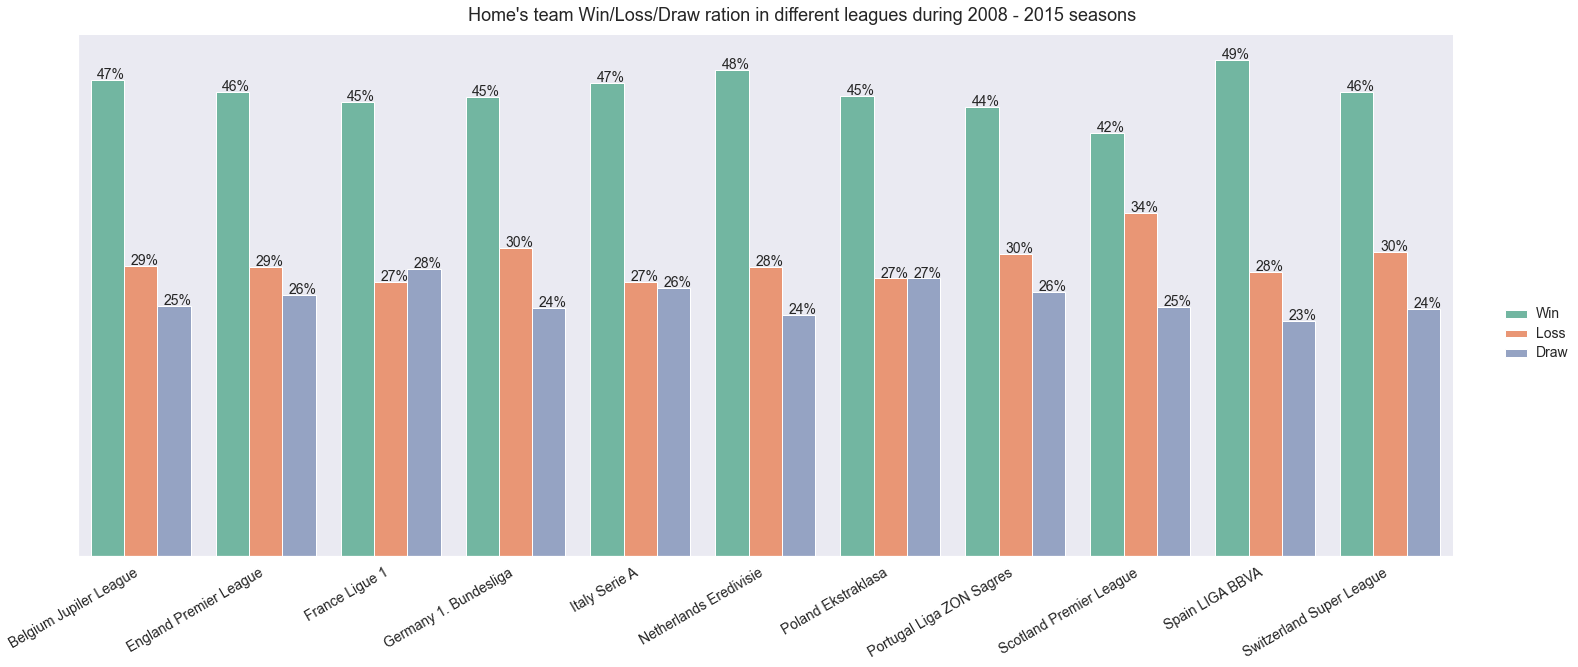

In [63]:
grouped_bar_plots(
    leag_matches,
    "league",
    "ratio",
    "home_team_result",
    "Home's team Win/Loss/Draw ration in different leagues during 2008 - 2015 seasons",
)

We see that results across leagues are quite similar to the results if taking overall ```Home``` teams ratio during 2008 - 2015 season. We can separate ```Scotland Premier League``` as ```Home``` team losing more matches when playing at their own stadium compared with other leagues.

In [64]:
sub_t = teams_stats_final.iloc[:, :3]
matches_df["season"] = matches_df["season"].astype(int)
sub_m = matches_df.iloc[:, np.r_[1:11, 104:108]]

In [65]:
df1 = pd.merge(
    sub_m,
    sub_t,
    how="left",
    left_on=["home_team_api_id"],
    right_on=["team_api_id"],
)

df1 = pd.merge(
    df1,
    sub_t,
    how="left",
    left_on=["away_team_api_id"],
    right_on=["team_api_id"],
    suffixes=("_HM", "_AW"),
)

df1.drop(df1[df1[["date_x", "match_api_id"]].duplicated() == True].index, inplace=True)

df1.drop(
    columns=["date_x", "date_y", "team_api_id_HM", "team_api_id_AW", "date"],
    inplace=True,
)
df1.rename(
    columns={
        "team_long_name_HM": "home_team_name",
        "team_long_name_AW": "away_team_name",
    },
    inplace=True,
)

In [66]:
teams_h = df1.groupby(["home_team_name", "away_team_name"], as_index=False).agg(
    {"home_team_goal": "max", "away_team_goal": "max"}
)
teams_h = teams_h.sort_values(by="home_team_goal", ascending=False)[:10]

In [67]:
x_labels_lst = []
for h, a in zip(teams_h["home_team_name"].values, teams_h["away_team_name"].values):
    home_name = " ".join([word for word in h.split() if len(word) > 2])
    away_name = " ".join([word for word in a.split() if len(word) > 2])
    string = home_name + " vs. " + away_name
    x_labels_lst.append(string)
legend_labels = ["Home Team goals", "Away Team goals"]
color1, color2 = ("darkblue", "lightblue")

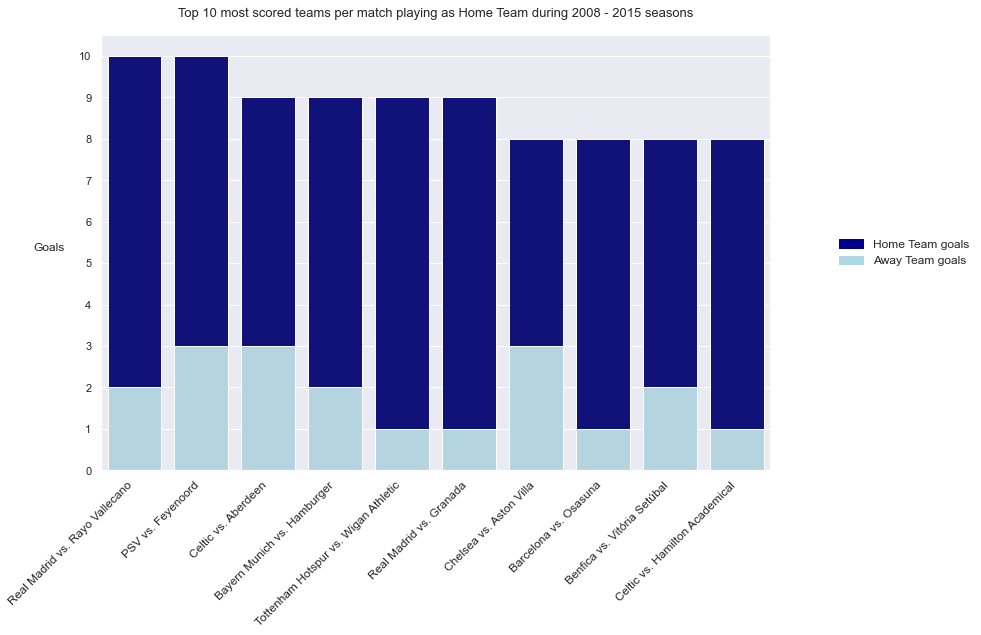

In [68]:
stacked_bars(
    teams_h,
    "home_team_goal",
    "away_team_goal",
    x_labels_lst,
    legend_labels,
    color1,
    color2,
    "Top 10 most scored teams per match playing as Home Team during 2008 - 2015 seasons",
)

We see that ```Home``` advantage really played out for Home teams, although team levels play a big role too. 

In [69]:
teams_a = df1.groupby(["away_team_name", "home_team_name"], as_index=False).agg(
    {"home_team_goal": "max", "away_team_goal": "max"}
)
teams_a = teams_a.sort_values(by="away_team_goal", ascending=False)[:10]

In [70]:
x_labels_lst2 = []
for h, a in zip(teams_a["home_team_name"].values, teams_a["away_team_name"].values):
    home_name = " ".join([word for word in h.split() if len(word) > 2])
    away_name = " ".join([word for word in a.split() if len(word) > 2])
    string = home_name + " vs. " + away_name
    x_labels_lst2.append(string)
legend_labels2 = ["Away Team goals", "Home Team goals"]
c1, c2 = ("lightblue", "darkblue")

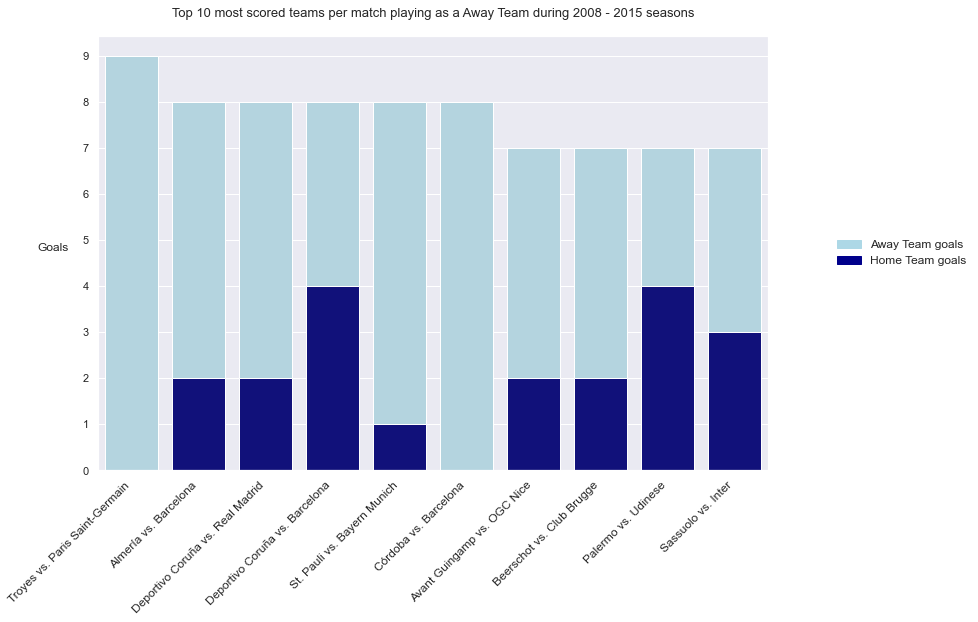

In [71]:
stacked_bars(
    teams_a,
    "away_team_goal",
    "home_team_goal",
    x_labels_lst2,
    legend_labels2,
    c1,
    c2,
    "Top 10 most scored teams per match playing as a Away Team during 2008 - 2015 seasons",
)

Even though playing as a guests, we see that more teams who have more skilled players in their lineup managed to beat ```Home``` teams by a big difference.

Let's look at players attributes correlation.

In [72]:
players_corr = player_stats_agg_df.iloc[:, 7:].corr()
players_corr_filtered = players_corr.mask(
    np.tril(np.ones(players_corr.shape)).astype(bool)
)
players_corr_filtered = players_corr_filtered.stack().reset_index()

In [73]:
players_corr_filtered[
    (players_corr_filtered[0] >= 0.8) | (players_corr_filtered[0] <= -0.8)
].sort_values(by=0, ascending=False)

,level_0,level_1,0
590,gk_handling,gk_positioning,0.971326
594,gk_positioning,gk_reflexes,0.971071
591,gk_handling,gk_reflexes,0.970859
567,marking,standing_tackle,0.951262
574,standing_tackle,sliding_tackle,0.945991
568,marking,sliding_tackle,0.929806
588,gk_diving,gk_reflexes,0.926814
587,gk_diving,gk_positioning,0.917147
585,gk_diving,gk_handling,0.916346
342,acceleration,sprint_speed,0.903734


We see some features are highly correlated between each other e.g. Attributes which explains goalkeeper's skills. As we have less numerical attributes for team, let's visualize teams stats correlation situation.

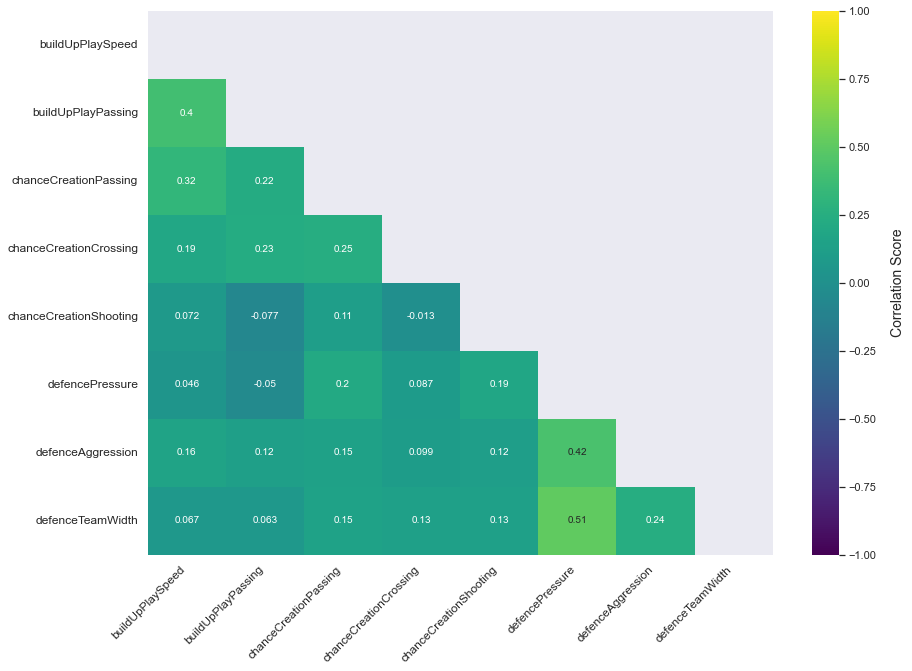

In [74]:
heat_map(teams_stats_final.iloc[:, 3:], "Team's attributes correlation", "viridis")

As we see, there no highly correlated feature, except ```defenceTeamWidth``` and ```defencePressure```.

## **Inferential Statistical Analysis**<a name="inf"></a>

### Confidence Intervals

**Two proportions confidence interval.**

I will construct a 95 % confidence interval of proportion difference of ```2008``` and ```2009``` season matches proportion of all 2008 - 2015 seasons.

In [75]:
two_p_g = matches_df.groupby("season", as_index=False).agg({"match_api_id": "count"})

In [76]:
s_2008 = two_p_g[two_p_g["season"] == 2008]["match_api_id"][0]
s_2009 = two_p_g[two_p_g["season"] == 2009]["match_api_id"][1]
total = two_p_g["match_api_id"].sum()

In [77]:
diff_in_proportions, lcb, ucb = two_p_diff_ci(s_2008, s_2009, total)

print(
    f"""Difference in two proportions: {diff_in_proportions:.3f}, Lower CI bound: {lcb:.3f}, Upper CI bound: {ucb:.3f}"""
)

Difference in two proportions: 0.004, Lower CI bound: -0.002, Upper CI bound: 0.009


As our 95 % confidence interval includes **0** we can't say for sure whether the football matches proportion of ```2008``` season is bigger or smaller from the proportion of ```2009``` season matches. We can say with 95 % confidence, that difference in proportions between mentioned years matches falls in -0.002 to 0.009 range.

**Confidence interval between two means.**

I will construct a 95 % confidence interval of goals per match mean difference of ```2008``` and ```2015``` seasons.

In [78]:
s_2008_goals = df1[df1["season"] == 2008]["total_goal_per_match"]
s_2015_goals = df1[df1["season"] == 2015]["total_goal_per_match"]

In [79]:
print(f"{s_2008_goals.describe()}, \n\n{s_2015_goals.describe()}")

count    3326.000000
mean        2.607336
std         1.627506
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: total_goal_per_match, dtype: float64, 

count    3326.000000
mean        2.754660
std         1.668803
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: total_goal_per_match, dtype: float64


As we see, standard deviations of ```2008``` and ```2015``` season total goals per match are not the same, thus variance is also not the same. We will use **Unpooled** approach to calculate confidence intervals.

In [80]:
mean_diff, lcb, ucb = diff_in_two_means_unpooled_ci(s_2008_goals, s_2015_goals)
print(
    f"""Difference in two means: {mean_diff:.3f}, Lower CI bound: {lcb:.3f}, Upper CI bound: {ucb:.3f}"""
)

Difference in two means: -0.147, Lower CI bound: -0.228, Upper CI bound: -0.066


With 95 % confidence, the difference in goal means, between ```2008``` and ```2015``` seasons is estimated to be **between -0.228 and -0.066.**

### Hypothesis Testing

Previously, we constructed 95 % confidence intervals for difference of two population proportions and means. Now, let's build on those confidence intervals and check if that difference is significant.  
First, **I will construct a hypothesis testing for difference in proportions.**

**Null Hypothesis: $H_0$** - There is no difference in match proportions between ```2008``` and ```2009``` seasons.   
**Alternative Hypothesis: $H_a$** - There is a difference in ```2008``` and ```2009``` seasons match proportions.  
**Significance level: 0.05**

In [81]:
prop_comb = ((s_2008 / total) * s_2008 + (s_2009 / total) * s_2009) / (s_2008 + s_2009)
va = prop_comb * (1 - prop_comb)
se = np.sqrt(va * (1 / s_2008 + 1 / s_2009))
test_stat = diff_in_proportions / se
pvalue = 2 * stats.norm.cdf(-np.abs(test_stat))
print(test_stat, pvalue)

0.45045077971344477 0.6523854370699289


We see that our Z statistic is quite small, and p-value is bigger than our ```Significance level``` we set up earlier. Thus we **do not have strong evidence** to reject our Null Hypothesis.

Now, we will construct Hypothesis testing for checking **is there a significance difference in ```total goals per match``` means between ```2008``` and ```2015``` seasons.**

**Null Hypothesis: $H_0$** - There is no difference in total goal per match means between ```2008``` and ```2015``` seasons.   
**Alternative Hypothesis: $H_a$** - There is a difference in ```2008``` and ```2015``` seasons total goal per match means.  
**Significance level: 0.05**

As true standard deviation of the population (**σ**) is **unknown** we are going to use a t-test.

In [82]:
t_score, p_value_t, _ = sm.stats.ttest_ind(s_2008_goals, s_2015_goals, usevar="unequal")
print(f"{t_score:.10f}, {p_value_t:.10f}")

-3.6449196186, 0.0002695176


As we see, our difference in sample means is -3.65 (estimated) standard errors below the Null Hypothesis difference of 0 (that means are equal). As our p-value is much smaller than our significance level of 0.05, a probability of observing such large test statistic just by chance is **very unlikely**. We **have strong evidence** against Null Hypothesis, thus we reject the null and state that means are different.

**Sampling and Permutation tests**

Let's do ```2008``` and ```2015``` seasons goals sampling with 95 % confidence intervals and check how our sampled means between seasons differ from actual mean difference and confidence intervals.

In [83]:
actual_mean_diff, mean_diff, lcb, ucb = sampling_mean_diff_ci(
    s_2008_goals, s_2015_goals, 100
)
print(
    f"""Actual difference of two means: {actual_mean_diff:.3f}, Sampled mean difference of two means:{mean_diff.mean():.3f},
Sampled lcb: {lcb:.3f}, Sampled ucb: {ucb:.3f}"""
)

Actual difference of two means: -0.147, Sampled mean difference of two means:-0.152,
Sampled lcb: -0.222, Sampled ucb: -0.080


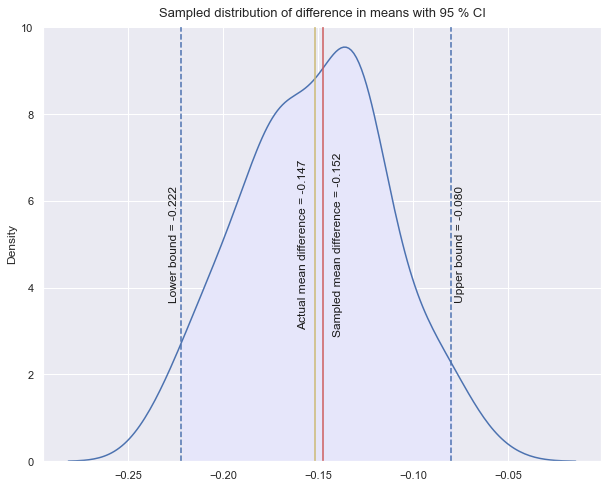

In [84]:
plot_mean_diff_conf_int(mean_diff, lcb, actual_mean_diff, ucb, color="k")

As we see after sampling 100 samples and plotting them, actual mean difference and sampled mean difference are close to each other as well as sampled confidence intervals and confidence intervals computed with ```Unpooled``` formula. These results let us make a conclusion that our results are quite robust. Now, let's also do a permutation test. 

In [85]:
perm_diffs = [perm_test(s_2008_goals, s_2015_goals) for _ in range(50)]

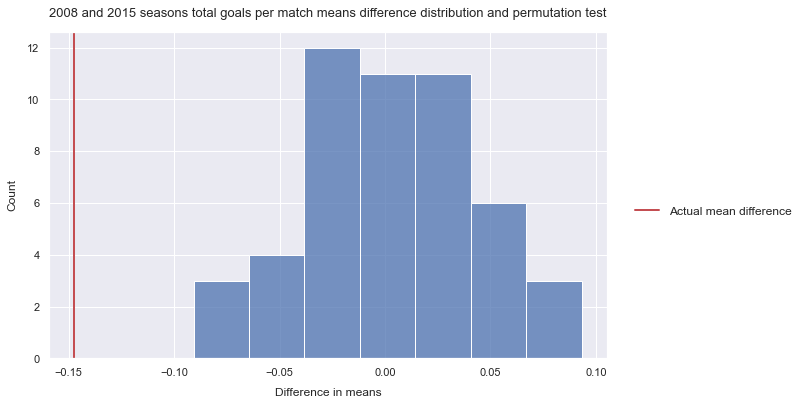

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.histplot(data=perm_diffs, kde=False)

lin = ax.axvline(actual_mean_diff, color="r", lw=2)

ax.legend(
    [lin],
    ["Actual mean difference"],
    bbox_to_anchor=(1.35, 0.5),
    facecolor="white",
    edgecolor="white",
    fontsize=12,
)

plt.xlabel("Difference in means", fontsize=12, labelpad=10)
plt.ylabel("Count", fontsize=12, labelpad=10)
plt.title(
    "2008 and 2015 seasons total goals per match means difference distribution and permutation test",
    fontsize=13,
    y=1.03,
)

plt.show()

We see from the chart, that actual mean difference lies far one the left side of distribution, confirming our earlier results of large ```z score``` and small ```p-value``` in our Hypothesis testing.

## **Machine Learning**<a name="ml"></a>

Firstly, let's join tables and prepare a data set for Machine learning models.

In [87]:
player_attr_ml = football_df_all["Player_Attributes"].copy()
team_attr_ml = football_df_all["Team_Attributes"].copy()
match_ml = football_df_all["Match"].copy()

In [88]:
match_subset = [
    "id",
    "date",
    "match_api_id",
    "home_team_api_id",
    "away_team_api_id",
    "home_team_goal",
    "away_team_goal",
    "B365H",
    "B365D",
    "B365A",
]
home_players_lst = ["home_player_" + str(x) for x in range(1, 12)]
away_players_lst = ["away_player_" + str(x) for x in range(1, 12)]
match_subset = match_subset + home_players_lst + away_players_lst
all_players_lst = home_players_lst + away_players_lst
match_ml = match_ml[match_subset]
match_ml.dropna(inplace=True)
match_ml = match_ml.sort_values(by="date")
match_ml["date"] = pd.to_datetime(match_ml["date"])

In [89]:
player_subset = ["player_api_id", "date", "overall_rating"]
player_attr_ml = player_attr_ml[player_subset]
player_attr_ml.dropna(inplace=True)
player_attr_ml = player_attr_ml.sort_values(by="date")
player_attr_ml["date"] = pd.to_datetime(player_attr_ml["date"])

In [90]:
for player in all_players_lst:

    match_ml[player] = match_ml[player].astype("int64")
    player_temp = player_attr_ml.rename(
        columns={col: f"{player}_{col}" for col in player_subset[1:]}
    )

    match_ml = pd.merge_asof(
        match_ml,
        player_temp,
        left_on="date",
        right_on=f"{player}_date",
        left_by=player,
        right_by="player_api_id",
        allow_exact_matches=False,
    )

    match_ml = match_ml.drop([f"{player}_date", player, "player_api_id"], axis=1)

In [91]:
team_attr_ml = team_attr_ml.sort_values(by="date")
team_attr_ml["date"] = pd.to_datetime(team_attr_ml["date"])

In [92]:
team_subset = [
    col
    for col in team_attr_ml.columns
    if team_attr_ml[col].dtype in ["int64", "datetime64[ns]"]
]
team_attr_lst = team_subset[4:]
team_attr_ml = team_attr_ml[team_subset]

In [93]:
for team_id in ["home_team_api_id", "away_team_api_id"]:
    team_temp = team_attr_ml.rename(
        columns={col: f"{team_id[:9]}_{col}" for col in team_attr_lst}
    )

    match_ml = pd.merge_asof(
        match_ml,
        team_temp,
        left_on="date",
        right_on="date",
        left_by=team_id,
        right_by="team_api_id",
    )

    match_ml = match_ml.drop(["team_api_id", "team_fifa_api_id"], axis=1)

In [94]:
match_ml.dropna(inplace=True)

In [95]:
match_ml["goal_difference"] = match_ml["home_team_goal"] - match_ml["away_team_goal"]
match_ml["match_outcome"] = 1  # Draw
match_ml["match_outcome"] = np.where(
    match_ml["goal_difference"] > 0, 2, match_ml["match_outcome"]
)  # Win
match_ml["match_outcome"] = np.where(
    match_ml["goal_difference"] < 0, 0, match_ml["match_outcome"]
)  # Loss

In [96]:
Y = match_ml["match_outcome"]

In [97]:
X = match_ml.drop(
    [
        "id",
        "id_x",
        "id_y",
        "date",
        "match_api_id",
        "home_team_api_id",
        "away_team_api_id",
        "home_team_goal",
        "away_team_goal",
        "B365H",
        "B365D",
        "B365A",
        "goal_difference",
        "match_outcome",
    ],
    axis=1,
)

After we prepared our data set for machine learning modelling, let first check betting company bets and how accurate they are. Let's first convert odds to probabilities.

In [98]:
betting_probs = match_ml[["B365H", "B365D", "B365A"]].copy()

In [99]:
for col in betting_probs.columns:
    betting_probs.loc[:, f"{col}_probability"] = 1 / betting_probs.loc[:, col]
for prob in ["B365H_probability", "B365D_probability", "B365A_probability"]:
    betting_probs.loc[:, prob] = betting_probs.loc[:, prob] / betting_probs[
        ["B365H_probability", "B365D_probability", "B365A_probability"]
    ].sum(axis=1)

In [100]:
betting_probs["betting_result"] = (
    betting_probs[["B365H_probability", "B365D_probability", "B365A_probability"]]
    .idxmax(axis=1)
    .map({"B365H_probability": 2, "B365D_probability": 1, "B365A_probability": 0})
)

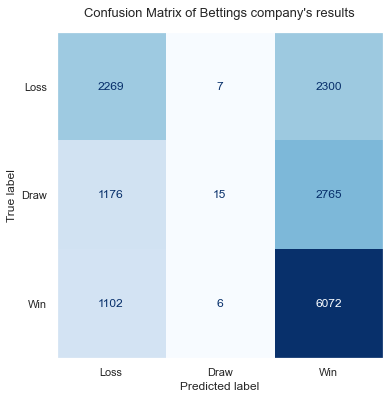

In [101]:
labels = ["Loss", "Draw", "Win"]

plot_cm_without_model(
    Y,
    betting_probs["betting_result"].values,
    labels,
    cmap="Blues",
    title="Confusion Matrix of Bettings company's results",
)

As we see betting companies predicting mostly every match as win, as we get a lot of False Positives in ```Win``` class. Let's also check classification report.

In [102]:
print(
    "Betting companies results\n",
    classification_report(Y, betting_probs["betting_result"], target_names=labels),
)

Betting companies results
               precision    recall  f1-score   support

        Loss       0.50      0.50      0.50      4576
        Draw       0.54      0.00      0.01      3956
         Win       0.55      0.85      0.66      7180

    accuracy                           0.53     15712
   macro avg       0.53      0.45      0.39     15712
weighted avg       0.53      0.53      0.45     15712



So, classification report confirms our earliest results from confusion matrix. ```Precision``` of ```Win``` class is quite hard, but on the other hand ```Recall``` is quite low, so Betting companies gets a lot of false wins in their bets. We can see a big struggle of predicting ```Draw``` class. A lot of ```Losses``` are predicted as ```Wins```. Overall accuracy is **53%**. Let's see if your machine learning models can predict results better.

###  Match outcome prediction with Logistic Regression and SVC

In [103]:
print(
    f"""    Loss macth outcome class size - {Y[Y==0].shape[0]}
    Draw match outcome class size - {Y[Y==1].shape[0]}
    Win match outcome class size -  {Y[Y==2].shape[0]}"""
)

    Loss macth outcome class size - 4576
    Draw match outcome class size - 3956
    Win match outcome class size -  7180


We see that our ```Loss``` and ```Draw``` classes are quite even, only ```Win``` class outweights the other classes. 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

Let's first use RandomGrid search without feature engineering.

In [105]:
log_pipe = Pipeline(
    [("scaler", MinMaxScaler()), ("classifier", LogisticRegression(max_iter=10000))]
)

We are going to use custom class balancing as it gives better results than scikit learn default class balancing. 

In [106]:
weights = np.linspace(0.01, 0.99, 50)

In [107]:
log_parameters = [
    {
        "scaler": [MinMaxScaler(), RobustScaler(), MaxAbsScaler(), StandardScaler()],
        "classifier__solver": ["lbfgs", "newton-cg"],
        "classifier__C": stats.loguniform(1e-4, 1e2),
        "classifier__class_weight": [{0: x, 1: 0.2 + x, 2: 1.0 - x} for x in weights],
        "classifier__multi_class": ["ovr", "multinomial"],
    },
]

In [108]:
log_grid = RandomizedSearchCV(
    log_pipe,
    log_parameters,
    n_iter=20,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1,
).fit(X_train, y_train)

In [109]:
print("Best model and parameters:")
log_grid.best_estimator_.steps

Best model and parameters:


[('scaler', StandardScaler()),
 ('classifier',
  LogisticRegression(C=0.017670169402947945,
                     class_weight={0: 0.5700000000000001, 1: 0.77,
                                   2: 0.42999999999999994},
                     max_iter=10000, multi_class='ovr'))]

In [110]:
log_grid_predicted = log_grid.predict(X_test)

In [111]:
print(
    "Logistic regression without feature engineering\n",
    classification_report(y_test, log_grid_predicted, target_names=labels),
)

Logistic regression without feature engineering
               precision    recall  f1-score   support

        Loss       0.47      0.49      0.48      1135
        Draw       0.31      0.27      0.29       996
         Win       0.60      0.63      0.61      1797

    accuracy                           0.50      3928
   macro avg       0.46      0.46      0.46      3928
weighted avg       0.49      0.50      0.49      3928



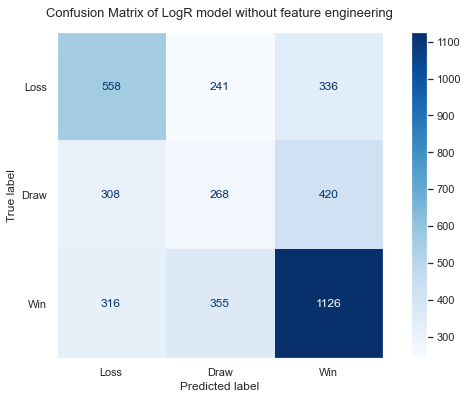

In [112]:
plot_cm(
    log_grid,
    X_test,
    y_test,
    labels,
    colorbar=True,
    cmap="Blues",
    title="Confusion Matrix of LogR model without feature engineering",
)

Ok, so our baseline model predicts match outcomes with less overall accuracy, but at least it predicts ```Draws``` better. Let's do some feature engineering and see if we can improve our results. 

In [113]:
home_players_list = [f"home_player_{str(x)}_overall_rating" for x in range(1, 12)]
away_players_list = [f"away_player_{str(x)}_overall_rating" for x in range(1, 12)]
home_team_attr = [f"home_team_{item}" for item in team_attr_lst]
away_team_attr = [f"away_team_{item}" for item in team_attr_lst]

In [114]:
X_transformed = X.copy()

for func in ["sum", "mean", "median", "std", "min", "max"]:
    X_transformed[f"home_players_{func}"] = X[home_players_list].apply(func, axis=1)
    X_transformed[f"away_players_{func}"] = X[away_players_list].apply(func, axis=1)
    X_transformed[f"home_team_attr_{func}"] = X[home_team_attr].apply(func, axis=1)
    X_transformed[f"away_team_attr_{func}"] = X[away_team_attr].apply(func, axis=1)

In [115]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(
    X_transformed, Y, random_state=42
)

In [116]:
log_grid_custom = RandomizedSearchCV(
    log_pipe,
    log_parameters,
    n_iter=20,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1,
).fit(X_train_tr, y_train_tr)

In [117]:
print("Best model and parameters:")
log_grid_custom.best_estimator_.steps

Best model and parameters:


[('scaler', StandardScaler()),
 ('classifier',
  LogisticRegression(C=0.017670169402947945,
                     class_weight={0: 0.5700000000000001, 1: 0.77,
                                   2: 0.42999999999999994},
                     max_iter=10000, multi_class='ovr'))]

In [118]:
log_grid_predicted_custom = log_grid_custom.predict(X_test_tr)

In [119]:
log_r_results = results_to_df(
    y_test, log_grid_predicted_custom, labels, "Log_R_with_additional_features"
)

In [120]:
print(
    "Logistic regression with feature engineering\n",
    classification_report(y_test_tr, log_grid_predicted_custom, target_names=labels),
)

Logistic regression with feature engineering
               precision    recall  f1-score   support

        Loss       0.48      0.49      0.49      1135
        Draw       0.32      0.28      0.30       996
         Win       0.60      0.62      0.61      1797

    accuracy                           0.50      3928
   macro avg       0.47      0.47      0.47      3928
weighted avg       0.49      0.50      0.50      3928



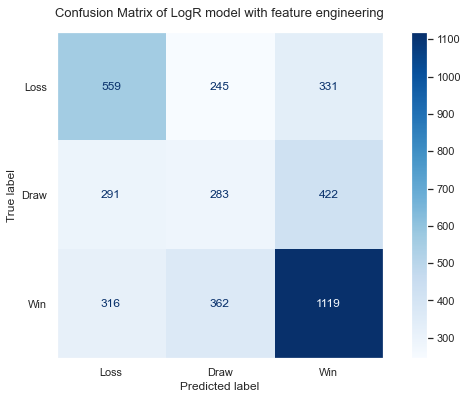

In [121]:
plot_cm(
    log_grid_custom,
    X_test_tr,
    y_test_tr,
    labels,
    colorbar=True,
    cmap="Blues",
    title="Confusion Matrix of LogR model with feature engineering",
)

Ok, so we see that feature engineering did bring a sligtly increase in perforamnce. Let's now try Support Vector Machine algorithm.

In [122]:
svm_pipe = Pipeline([("scaler", MinMaxScaler()), ("classifier", LinearSVC(dual=False))])

In [123]:
svm_parameters = {
    "scaler": [MinMaxScaler(), RobustScaler(), MaxAbsScaler(), StandardScaler()],
    "classifier__class_weight": [{0: x - 0.2, 1: 0.1 + x, 2: 1.0 - x} for x in weights],
    "classifier__C": stats.loguniform(1e-4, 1e2),
}

In [124]:
svm_grid = RandomizedSearchCV(
    svm_pipe,
    svm_parameters,
    n_iter=20,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1,
).fit(X_train, y_train)

In [125]:
print("Best model and parameters:")
svm_grid.best_estimator_.steps

Best model and parameters:


[('scaler', StandardScaler()),
 ('classifier', LinearSVC(C=0.05694995061301532,
            class_weight={0: 0.51, 1: 0.81, 2: 0.2899999999999999}, dual=False))]

In [126]:
svm_grid_predicted = svm_grid.predict(X_test)

In [127]:
print(
    "Linear SVM without feature engineering\n",
    classification_report(y_test, svm_grid_predicted, target_names=labels),
)

Linear SVM without feature engineering
               precision    recall  f1-score   support

        Loss       0.45      0.54      0.49      1135
        Draw       0.30      0.22      0.26       996
         Win       0.60      0.61      0.61      1797

    accuracy                           0.49      3928
   macro avg       0.45      0.46      0.45      3928
weighted avg       0.48      0.49      0.49      3928



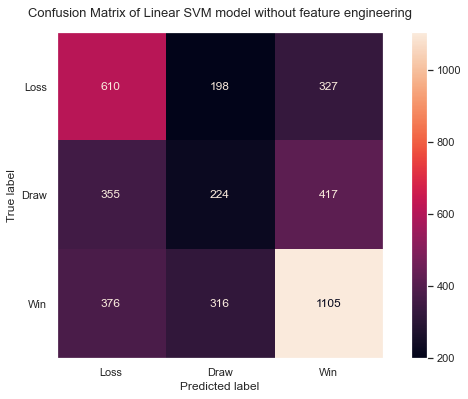

In [128]:
plot_cm(
    svm_grid,
    X_test,
    y_test,
    labels,
    colorbar=True,
    title="Confusion Matrix of Linear SVM model without feature engineering",
)

So, we see that Linear SVM model did better job at predicting ```Wins``` and did as good as Logistic Regression on predicting ```Losses```, but failed on classifying ```Draws```. Let's see how SVM will perform on a data set with several additional features we have created.

In [129]:
svm_grid_custom = RandomizedSearchCV(
    svm_pipe,
    svm_parameters,
    n_iter=20,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1,
).fit(X_train_tr, y_train_tr)

In [130]:
print("Best model and parameters:")
svm_grid_custom.best_estimator_.steps

Best model and parameters:


[('scaler', RobustScaler()),
 ('classifier', LinearSVC(C=28.570800750407212,
            class_weight={0: 0.51, 1: 0.81, 2: 0.2899999999999999}, dual=False))]

In [131]:
svm_grid_predicted_custom = log_grid_custom.predict(X_test_tr)

In [132]:
svm_grid_results = results_to_df(
    y_test, svm_grid_predicted_custom, labels, "Linear_SVM_with_additional_features"
)

In [133]:
print(
    "Linear SVM with feature engineering\n",
    classification_report(y_test, svm_grid_predicted_custom, target_names=labels),
)

Linear SVM with feature engineering
               precision    recall  f1-score   support

        Loss       0.48      0.49      0.49      1135
        Draw       0.32      0.28      0.30       996
         Win       0.60      0.62      0.61      1797

    accuracy                           0.50      3928
   macro avg       0.47      0.47      0.47      3928
weighted avg       0.49      0.50      0.50      3928



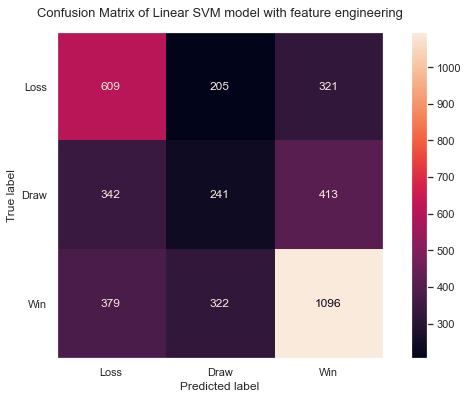

In [134]:
plot_cm(
    svm_grid_custom,
    X_test_tr,
    y_test_tr,
    labels,
    colorbar=True,
    title="Confusion Matrix of Linear SVM model with feature engineering",
)

As with Logistic Regression, Linear SVM model performs a little bit better on a data set with engineered features.

In [135]:
log_grid_custom.best_estimator_.steps[1][1]

LogisticRegression(C=0.017670169402947945,
                   class_weight={0: 0.5700000000000001, 1: 0.77,
                                 2: 0.42999999999999994},
                   max_iter=10000, multi_class='ovr')

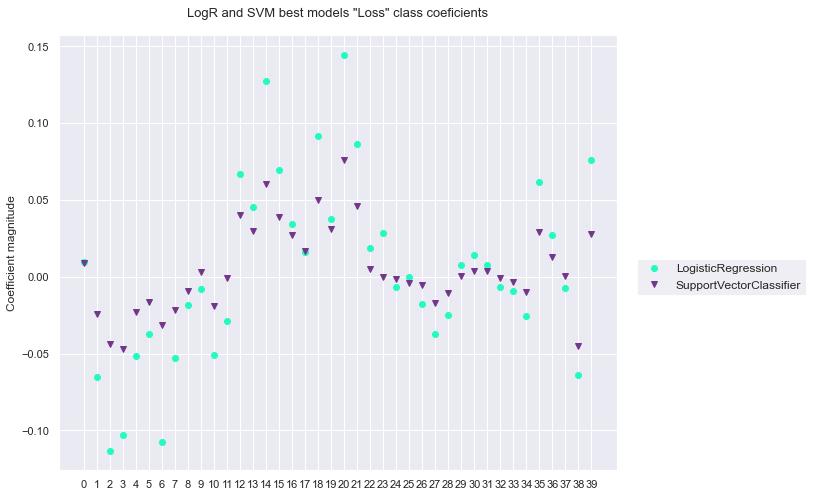

In [136]:
plot_coefficients(
    [
        log_grid_custom.best_estimator_.steps[1][1].coef_[0][:40],
        svm_grid_custom.best_estimator_.steps[1][1].coef_[0][:40],
    ],
    [
        "LogisticRegression",
        "SupportVectorClassifier",
    ],
    title='LogR and SVM best models "Loss" class coeficients',
)

We see a ```Regularization``` parameter in action as Logistic Regression and SVM parameter ```C``` is very small,  **0.017** and **0.057** accordingly. ```Regularization``` pushes coefficients of both models close to zero.

**Logistic Regression and Linear SVM models result summary** 

In [137]:
pd.merge(
    log_r_results, svm_grid_results, left_index=True, right_index=True
).T.style.background_gradient(axis=0).format(precision=3)

,precision,recall,f1-score
Log_R_with_additional_features_Loss,0.479,0.493,0.486
Log_R_with_additional_features_Draw,0.318,0.284,0.300
Log_R_with_additional_features_Win,0.598,0.623,0.610
Log_R_with_additional_features_accuracy,0.499,0.499,0.499
Log_R_with_additional_features_macro avg,0.465,0.466,0.465
Linear_SVM_with_additional_features_Loss,0.479,0.493,0.486
Linear_SVM_with_additional_features_Draw,0.318,0.284,0.300
Linear_SVM_with_additional_features_Win,0.598,0.623,0.610
Linear_SVM_with_additional_features_accuracy,0.499,0.499,0.499
Linear_SVM_with_additional_features_macro avg,0.465,0.466,0.465


From the table we see where our best two models so far perform well. Main bottleneck is ```Draw``` class where both models struggle to identify them correctly.

###  Predicting how many goals each team will score in each match with Logistic Regression and SVM

As goals are discrete variables we will model prediction as classification problems.

In [138]:
X_goals = match_ml.copy()
X_goals = X_goals.iloc[:, np.r_[10:50]]
X_goals.drop(columns=["id", "id_y"], inplace=True)

In [139]:
Y_goals = match_ml.copy()
Y_goals = Y_goals.loc[:, ["home_team_goal", "away_team_goal"]]

Let's drop more matches with more than 5 goals per match, as those matches are mostly outliers and rare cases.

In [140]:
subset_to_drop = Y_goals[
    (Y_goals["home_team_goal"] > 5) | (Y_goals["away_team_goal"] > 5)
].index
Y_goals.drop(subset_to_drop, inplace=True)
X_goals.drop(subset_to_drop, inplace=True)

In [141]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_goals, Y_goals, random_state=42
)

In [142]:
class_weights = 1 - (Y_goals["away_team_goal"].value_counts() / len(Y_goals))

In [143]:
params = dict(
    class_weight={
        k: v for k, v in zip(class_weights.index.values, class_weights.values)
    },
    multi_class="multinomial",
    max_iter=10000,
    n_jobs=-1,
)

In [144]:
log_g = MultiOutputClassifier(LogisticRegression(**params))

In [145]:
log_pipe_g = Pipeline([("scaler", RobustScaler()), ("classifier", log_g)])

In [146]:
log_pipe_g.fit(X_train_g, y_train_g)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(class_weight={0: 0.6698478204797524,
                                                                                  1: 0.6554681454733041,
                                                                                  2: 0.7968790301779727,
                                                                                  3: 0.9157854010833119,
                                                                                  4: 0.9707892700541656,
                                                                                  5: 0.9912303327314934},
                                                                    max_iter=10000,
                                                                    multi_class='multinomial',
                                                                    n_jobs=-1)))])

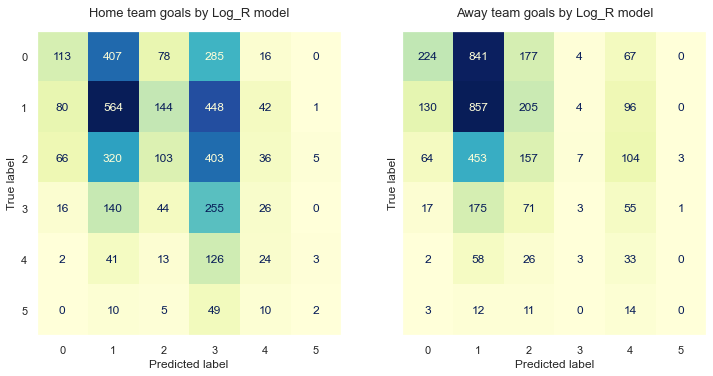

In [147]:
title_lst_log = ["Home team goals by Log_R model", "Away team goals by Log_R model"]

plot_multioutput_cm(
    log_pipe_g.steps[1][1].estimators_, X_test_g, y_test_g, title_lst_log, cmap="YlGnBu"
)

So, we see that our baseline classifier predicts some classes quite accurate, but some classes are predicted very poorly. Let's try a SVM model to compare results.

In [148]:
svm_params = dict(
    C=1,
    class_weight={
        k: v for k, v in zip(class_weights.index.values, class_weights.values)
    },
    dual=False,
)

In [149]:
svm_g = MultiOutputClassifier(LinearSVC(**svm_params))

In [150]:
svm_pipe_g = Pipeline([("scaler", RobustScaler()), ("classifier", svm_g)])

In [151]:
svm_pipe_g.fit(X_train_g, y_train_g)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 MultiOutputClassifier(estimator=LinearSVC(C=1,
                                                           class_weight={0: 0.6698478204797524,
                                                                         1: 0.6554681454733041,
                                                                         2: 0.7968790301779727,
                                                                         3: 0.9157854010833119,
                                                                         4: 0.9707892700541656,
                                                                         5: 0.9912303327314934},
                                                           dual=False)))])

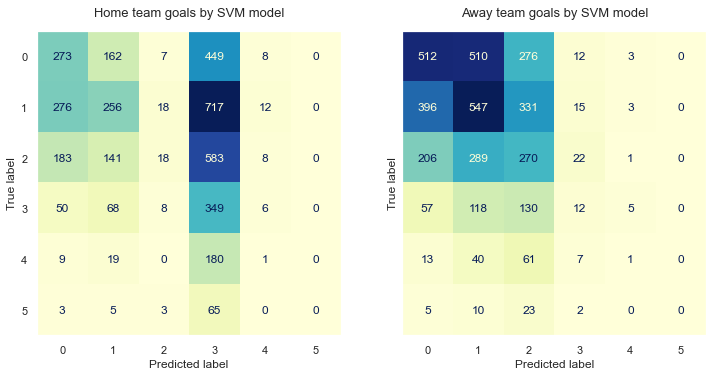

In [152]:
title_lst_svm = ["Home team goals by SVM model", "Away team goals by SVM model"]

plot_multioutput_cm(
    svm_pipe_g.steps[1][1].estimators_, X_test_g, y_test_g, title_lst_svm, cmap="YlGnBu"
)

We see that some goal classes are misclassified a lot. Both Logistic and SVM classifier find it difficult to clasify 0 goal and 1 goal classes. We could use data augmentation (**SMOTE**) technique, but unfortunately, ```imblearn``` library does not has SMOTE implementation in a multi output classification models.

In [153]:
log_r_home = log_pipe_g.steps[1][1].estimators_[0].predict(X_test_g)
log_r_away = log_pipe_g.steps[1][1].estimators_[1].predict(X_test_g)
log_home_goals = results_to_df(y_test_g.iloc[:, 0], log_r_home, range(6), "Log_R_Home")
log_away_goals = results_to_df(y_test_g.iloc[:, 1], log_r_away, range(6), "Log_R_Away")

In [154]:
svm_home = svm_pipe_g.steps[1][1].estimators_[0].predict(X_test_g)
svm_away = svm_pipe_g.steps[1][1].estimators_[1].predict(X_test_g)
svm_home_goals = results_to_df(y_test_g.iloc[:, 0], svm_home, range(6), "SVM_Home")
svm_away_goals = results_to_df(y_test_g.iloc[:, 1], svm_away, range(6), "SVM_Away")

In [155]:
result_df = log_home_goals
for df in [log_away_goals, svm_home_goals, svm_away_goals]:
    result_df = result_df.merge(df, left_index=True, right_index=True)

In [156]:
result_df.T.style.background_gradient(axis=0).format(precision=3)

,precision,recall,f1-score
Log_R_Home_0,0.408,0.126,0.192
Log_R_Home_1,0.381,0.441,0.409
Log_R_Home_2,0.266,0.110,0.156
Log_R_Home_3,0.163,0.530,0.249
Log_R_Home_4,0.156,0.115,0.132
Log_R_Home_5,0.182,0.026,0.046
Log_R_Home_accuracy,0.274,0.274,0.274
Log_R_Home_macro avg,0.259,0.225,0.197
Log_R_Away_0,0.509,0.171,0.256
Log_R_Away_1,0.358,0.663,0.465


## Conclusion <a name="conclusion"></a>

 1.   Lionel Messi and Christiano Ronaldo were dominating European leagues during 2008 - 2015 seasons.
 2.   ```England Premiere League```  has most players who were able to score 5 goals per match.
 3.   When playing at home arena teams win on average from 44 % to 47 % of total matches.  
 4.   In ```Scotland Premier League``` Home teams loose more matches compared to  other leagues.
 5.   Our Hypothesis Testing revealed, that there is a ```significance difference``` in total goals averages scored by both teams during the match between 2008 and 2015 seasons.
 6.   ```Bet365``` company's bets predicts half of ```Wins``` and half of ```Losses``` right, but struggles to predict ```Draws```. So F1 score is very low.
 7.   We eighted classes according to their sample size and also added custom weights too. We concentrated on f1 macro score to get reasonable scores for all 3 classes. We ere able to get a maximum f1 macro score of 47 % compared with betting companies 39 %. 
 8.   For predicting both teams number of goals during match, we used a MultiOutputClassifier. Unfortunately as data is heavily inbalanced, class weights did not help much. Perhaps ```Data generation```  strategies like SMOTE could help, but currently library we were using did not support multi output models.

## Bonus Challenge - Using PCA to check feature importance<a name="bonus"></a>

In [157]:
X_pca = X.copy()

In [158]:
pca_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=5))])

In [159]:
X_pca_t = pca_pipe.fit_transform(X_pca)

Let's plot first two components and color them with our match outcome labels.

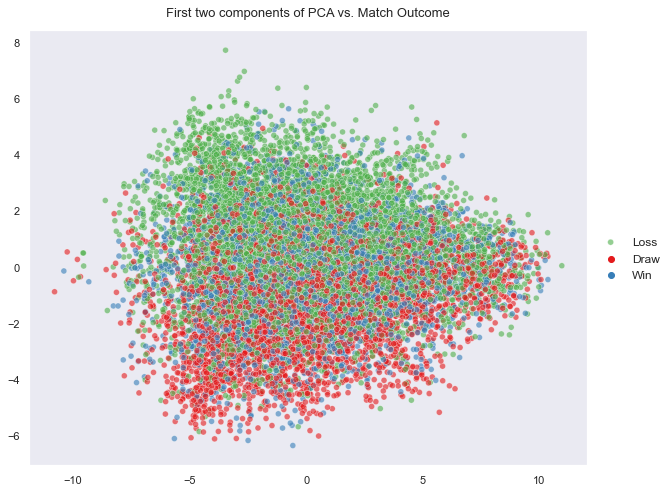

In [160]:
leg_labels_pca = ["Loss", "Draw", "Win"]

fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.scatterplot(x=X_pca_t[:, 0], y=X_pca_t[:, 1], hue=Y, alpha=0.6, palette="Set1")

ax.legend(
    labels=leg_labels_pca,
    bbox_to_anchor=(1.15, 0.55),
    edgecolor="white",
    facecolor="white",
    fontsize=12,
)

ax.set_title(
    "First two components of PCA vs. Match Outcome",
    fontsize=13,
    y=1.02,
)

plt.grid(False)

plt.show()

Ok, so we can see some kind of separation between ```Loss``` and ```Win```classes, but ```Draw``` class is distributed all over the grid. Let's plot a heatmap of our 5 components coefficients to understand them better. 

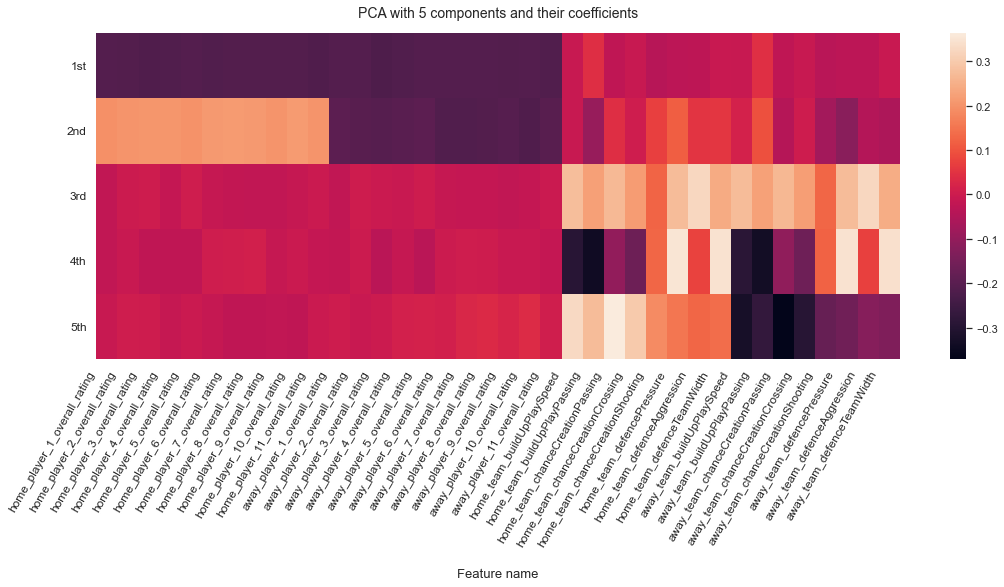

In [161]:
comp_lst = ["1st", "2nd", "3rd", "4th", "5th"]

fig, ax = plt.subplots(figsize=(18, 6))

ax = sns.heatmap(pca_pipe.steps[1][1].components_)

ax.set_xticks(range(len(X.columns)))
ax.set_xticklabels(X.columns, fontsize=12, rotation=60, ha="right")

y_locator = FixedLocator([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
y_formatter = FixedFormatter(comp_lst)
ax.yaxis.set_major_locator(y_locator)
ax.yaxis.set_major_formatter(y_formatter)
ax.tick_params(axis="y", which="major", rotation=0, labelsize=12)

ax.set_xlabel("Feature name", fontsize=13, labelpad=20)

ax.set_title(
    "PCA with 5 components and their coefficients",
    fontsize=14,
    y=1.03,
)

plt.show()

PCA put's maximum possible information into the 1st principal component, then maximum remaining information into the 2nd and so on. As we see below - the first principal component explains 30% of total variance, 2nd - already only 10.79%.

In [162]:
pd.DataFrame(pca_pipe.steps[1][1].explained_variance_ratio_ * 100).T

,0,1,2,3,4
0,30.047406,10.788899,7.380958,4.740122,3.827558


In [163]:
pca_results = pd.DataFrame(pca_pipe.steps[1][1].components_, columns=X_pca.columns).T
pca_results = pca_results.rename(
    columns={col: f"{col+1}_principal_component" for col in pca_results.columns}
)
for col in pca_results.columns:
    pca_results[col] = sorted(pca_results[col], key=abs, reverse=True)

In [164]:
pca_results.style.format(precision=3)

,1_principal_component,2_principal_component,3_principal_component,4_principal_component,5_principal_component
home_player_1_overall_rating,-0.219,-0.216,0.324,0.352,-0.371
home_player_2_overall_rating,-0.219,-0.215,0.323,0.346,0.363
home_player_3_overall_rating,-0.216,-0.214,0.275,0.345,0.329
home_player_4_overall_rating,-0.216,0.214,0.274,0.342,-0.327
home_player_5_overall_rating,-0.216,0.213,0.273,-0.341,0.298
home_player_6_overall_rating,-0.215,-0.212,0.272,-0.335,-0.296
home_player_7_overall_rating,-0.214,0.211,0.268,-0.293,-0.272
home_player_8_overall_rating,-0.212,0.210,0.265,-0.290,0.272
home_player_9_overall_rating,-0.212,-0.207,0.245,-0.167,0.187
home_player_10_overall_rating,-0.211,-0.205,0.242,-0.163,-0.178


We see that both team players contribute most to all principal components and other feature contributes less. Let's check if PCA can improve our classification model for predicting match outcome results.

In [165]:
log_pipe_pca = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=5)),
        ("classifier", LogisticRegression(max_iter=10000)),
    ]
)

In [166]:
log_grid_pca = RandomizedSearchCV(
    log_pipe_pca,
    log_parameters,
    n_iter=20,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1,
).fit(X_train, y_train)

In [167]:
print("Best model and parameters:")
log_grid_pca.best_estimator_.steps

Best model and parameters:


[('scaler', StandardScaler()),
 ('pca', PCA(n_components=5)),
 ('classifier',
  LogisticRegression(C=0.017670169402947945,
                     class_weight={0: 0.5700000000000001, 1: 0.77,
                                   2: 0.42999999999999994},
                     max_iter=10000, multi_class='ovr'))]

In [168]:
log_grid_pca_p = log_grid_pca.predict(X_test)

In [169]:
print(
    "Logistic regression with PCA\n",
    classification_report(y_test, log_grid_pca_p, target_names=labels),
)

Logistic regression with PCA
               precision    recall  f1-score   support

        Loss       0.48      0.49      0.48      1135
        Draw       0.30      0.26      0.28       996
         Win       0.59      0.62      0.61      1797

    accuracy                           0.49      3928
   macro avg       0.45      0.46      0.46      3928
weighted avg       0.48      0.49      0.49      3928



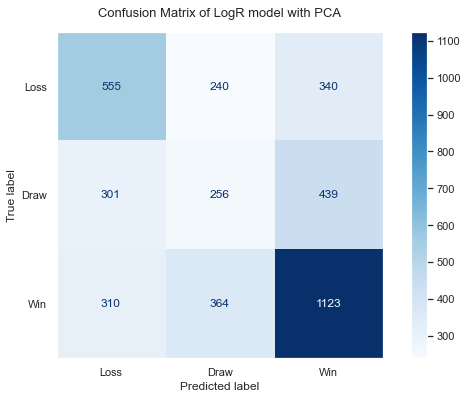

In [170]:
plot_cm(
    log_grid_pca,
    X_test,
    y_test,
    labels,
    colorbar=True,
    cmap="Blues",
    title="Confusion Matrix of LogR model with PCA",
)

So, we see that our results were not improved with using PCA.